# Combining two or more trading strategies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv("../../exercises/data/twenty_minutes.csv",
                 parse_dates=["Date"],
                 index_col="Date")
df

,EURUSD,GBPUSD,EURAUD
Date,,,
2019-01-01 22:00:00+00:00,1.146320,1.274770,1.626290
2019-01-01 22:20:00+00:00,1.146455,1.274740,1.626695
2019-01-01 22:40:00+00:00,1.146410,1.273980,1.627340
2019-01-01 23:00:00+00:00,1.146670,1.275030,1.626540
2019-01-01 23:20:00+00:00,1.146630,1.275150,1.627450
...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,1.334830,1.616940
2020-08-30 22:40:00+00:00,1.190860,1.334515,1.617120
2020-08-30 23:00:00+00:00,1.190690,1.334905,1.617360


In [3]:
from os.path import dirname, abspath, join, curdir
import samples.SMABacktester as SMA


In [4]:
datapath = join(dirname(dirname(abspath(curdir))), "exercises", "data", "twenty_minutes.csv")

sma_tester = SMA.SMABacktester("EURUSD",
                           datapath,
                           SMA_S=50, 
                           SMA_L=150, 
                           start="2019-01-01",
                           end="2020-08-30",
                           tc=0.00007)
sma_tester

SMABacktester(symbol=EURUSD, SMA_S=50, SMA_L=150, start=2019-01-01, end=2020-08-30)

In [5]:
sma_tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2019-01-01 22:00:00+00:00,1.146320,NaN,NaN,NaN
2019-01-01 22:20:00+00:00,1.146455,0.000118,NaN,NaN
2019-01-01 22:40:00+00:00,1.146410,-0.000039,NaN,NaN
2019-01-01 23:00:00+00:00,1.146670,0.000227,NaN,NaN
2019-01-01 23:20:00+00:00,1.146630,-0.000035,NaN,NaN
...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.189587,1.185039
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.189669,1.185091
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.189746,1.185141


In [6]:
sma_tester.test_strategy()

(1.167425, 0.121157)

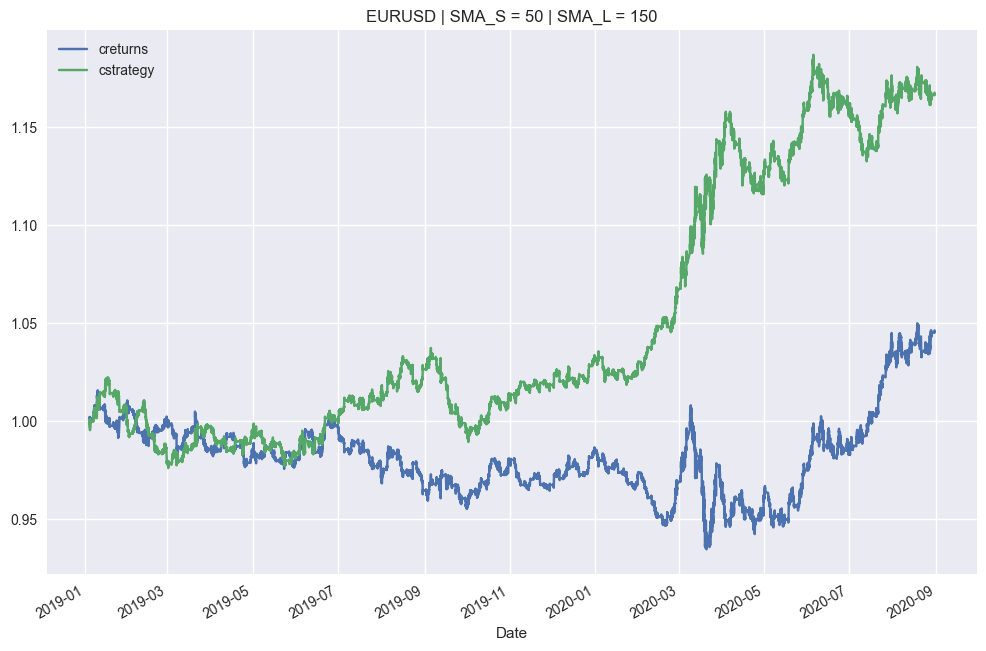

In [7]:
sma_tester.plot_results()

In [8]:
sma_tester.results

,price,returns,SMA_S,SMA_L,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,
2019-01-04 00:00:00+00:00,1.139460,0.000391,1.138221,1.139135,-1,-0.000391,0.0,1.000391,0.999609
2019-01-04 00:20:00+00:00,1.139845,0.000338,1.138279,1.139091,-1,-0.000338,0.0,1.000729,0.999272
2019-01-04 00:40:00+00:00,1.140560,0.000627,1.138358,1.139052,-1,-0.000627,0.0,1.001356,0.998645
2019-01-04 01:00:00+00:00,1.140545,-0.000013,1.138418,1.139011,-1,0.000013,0.0,1.001343,0.998659
2019-01-04 01:20:00+00:00,1.140750,0.000180,1.138473,1.138972,-1,-0.000180,0.0,1.001523,0.998479
...,...,...,...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.189587,1.185039,1,0.000382,0.0,1.045614,1.166695
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.189669,1.185091,1,-0.000092,0.0,1.045517,1.166587
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.189746,1.185141,1,-0.000143,0.0,1.045368,1.166421


In [9]:
import samples.BollingerBacktester as BB

In [10]:
bb_tester = BB.BollingerBacktester("EURUSD",
                                   datapath,
                                   start="2019-01-01",
                                   end="2020-08-30",
                                   SMA_m=75,
                                   deviation=3,
                                   tcost=0.00007)
bb_tester

BollingerBacktester(symbol=EURUSD, SMA_m=75, dev=3, start=2019-01-01, end=2020-08-30)

In [11]:
bb_tester.data

,price,Returns,SMA,Lower,Upper,Distance
Date,,,,,,
2019-01-01 22:00:00+00:00,1.146320,NaN,NaN,NaN,NaN,NaN
2019-01-01 22:20:00+00:00,1.146455,0.000118,NaN,NaN,NaN,NaN
2019-01-01 22:40:00+00:00,1.146410,-0.000039,NaN,NaN,NaN,NaN
2019-01-01 23:00:00+00:00,1.146670,0.000227,NaN,NaN,NaN,NaN
2019-01-01 23:20:00+00:00,1.146630,-0.000035,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.187613,1.178012,1.197214,0.003357
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.187729,1.178260,1.197199,0.003131
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.187841,1.178514,1.197169,0.002849


In [12]:
bb_tester.test_strategy()

(1.013488, -0.038307)

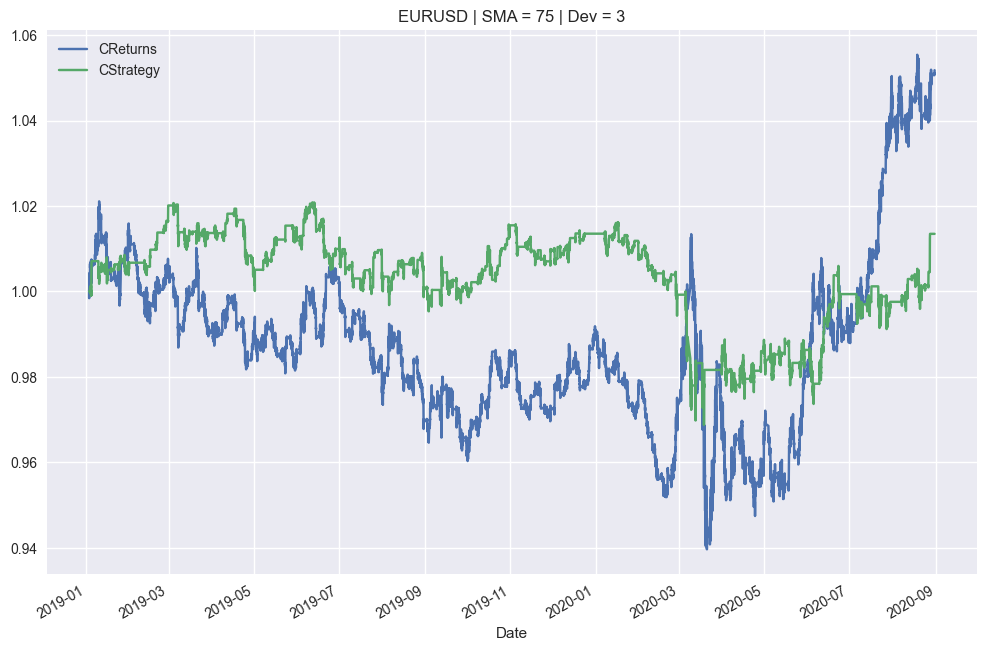

In [13]:
bb_tester.plot_results()

In [14]:
bb_tester.results

,price,Returns,SMA,Lower,Upper,Distance,Position,Strategy,Trades,CReturns,CStrategy
Date,,,,,,,,,,,
2019-01-02 23:00:00+00:00,1.133395,0.000322,1.140925,1.124549,1.157301,-0.007530,0.0,0.0,0.0,1.000322,1.000000
2019-01-02 23:20:00+00:00,1.133210,-0.000163,1.140748,1.124273,1.157223,-0.007538,0.0,-0.0,0.0,1.000159,1.000000
2019-01-02 23:40:00+00:00,1.131250,-0.001731,1.140546,1.123869,1.157223,-0.009296,0.0,-0.0,0.0,0.998429,1.000000
2019-01-03 00:00:00+00:00,1.133775,0.002230,1.140374,1.123675,1.157074,-0.006599,0.0,0.0,0.0,1.000658,1.000000
2019-01-03 00:20:00+00:00,1.133955,0.000159,1.140205,1.123506,1.156905,-0.006250,0.0,0.0,0.0,1.000816,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.187613,1.178012,1.197214,0.003357,0.0,0.0,0.0,1.051137,1.013488
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.187729,1.178260,1.197199,0.003131,0.0,-0.0,0.0,1.051040,1.013488
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.187841,1.178514,1.197169,0.002849,0.0,-0.0,0.0,1.050890,1.013488


In [15]:
bb_tester.results.Trades.value_counts()

Trades
0.0    30520
1.0      422
Name: count, dtype: int64

## Combine SMA and Bollinger Band Strategies

In [16]:
comb = sma_tester.results.loc[:, ["returns", "position"]].copy()
comb.rename(columns={"position": "position_SMA"}, inplace=True)
comb['position_BB'] = bb_tester.results.Position.astype('int')
comb

,returns,position_SMA,position_BB
Date,,,
2019-01-04 00:00:00+00:00,0.000391,-1,-1
2019-01-04 00:20:00+00:00,0.000338,-1,-1
2019-01-04 00:40:00+00:00,0.000627,-1,-1
2019-01-04 01:00:00+00:00,-0.000013,-1,-1
2019-01-04 01:20:00+00:00,0.000180,-1,-1
...,...,...,...
2020-08-30 22:20:00+00:00,0.000382,1,0
2020-08-30 22:40:00+00:00,-0.000092,1,0
2020-08-30 23:00:00+00:00,-0.000143,1,0


## Using a unanimous position strategy

In [19]:
comb['position_comb'] = np.where(comb.position_SMA == comb.position_BB, comb.position_BB, 0)
comb.head(60)

,returns,position_SMA,position_BB,position_comb
Date,,,,
2019-01-04 00:00:00+00:00,0.000391,-1,-1,-1
2019-01-04 00:20:00+00:00,0.000338,-1,-1,-1
2019-01-04 00:40:00+00:00,0.000627,-1,-1,-1
2019-01-04 01:00:00+00:00,-0.000013,-1,-1,-1
2019-01-04 01:20:00+00:00,0.000180,-1,-1,-1
2019-01-04 01:40:00+00:00,-0.000298,-1,-1,-1
2019-01-04 02:00:00+00:00,0.000241,-1,-1,-1
2019-01-04 02:20:00+00:00,-0.000487,-1,-1,-1
2019-01-04 02:40:00+00:00,-0.000329,-1,-1,-1


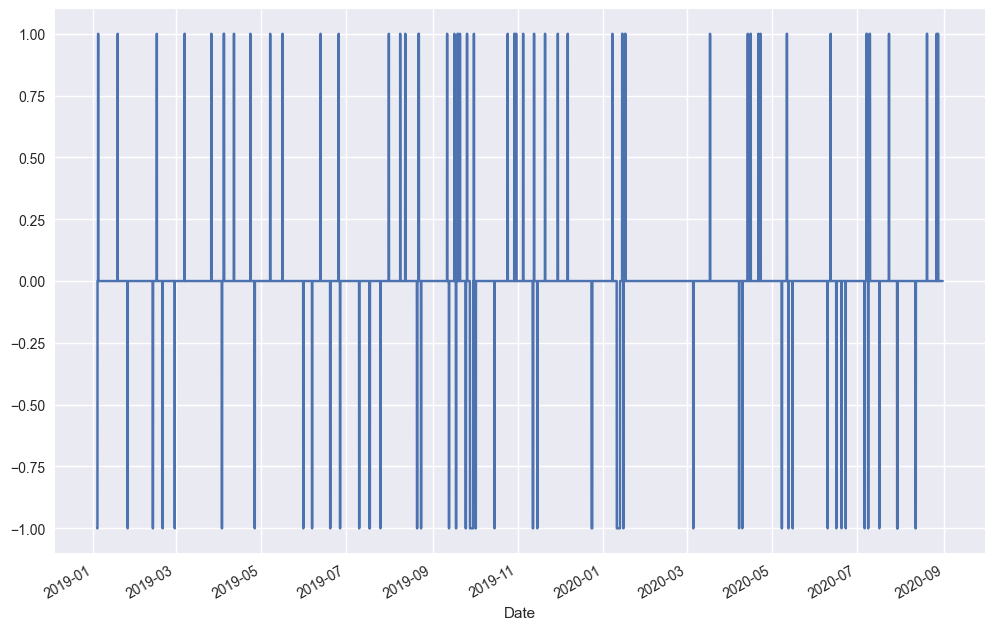

In [20]:
comb.position_comb.plot(figsize=(12, 8))
plt.show()

### Accounting for busy trading hours

In [21]:
comb["EST"] = comb.index.tz_convert("America/New_York")
comb["hour"] = comb.EST.dt.hour
comb

,returns,position_SMA,position_BB,position_comb,EST,hour
Date,,,,,,
2019-01-04 00:00:00+00:00,0.000391,-1,-1,-1,2019-01-03 19:00:00-05:00,19
2019-01-04 00:20:00+00:00,0.000338,-1,-1,-1,2019-01-03 19:20:00-05:00,19
2019-01-04 00:40:00+00:00,0.000627,-1,-1,-1,2019-01-03 19:40:00-05:00,19
2019-01-04 01:00:00+00:00,-0.000013,-1,-1,-1,2019-01-03 20:00:00-05:00,20
2019-01-04 01:20:00+00:00,0.000180,-1,-1,-1,2019-01-03 20:20:00-05:00,20
...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,0.000382,1,0,0,2020-08-30 18:20:00-04:00,18
2020-08-30 22:40:00+00:00,-0.000092,1,0,0,2020-08-30 18:40:00-04:00,18
2020-08-30 23:00:00+00:00,-0.000143,1,0,0,2020-08-30 19:00:00-04:00,19


In [22]:
comb.position_comb = np.where(comb.hour.between(2, 12), comb.position_comb, 0)
comb.position_comb.value_counts()

position_comb
 0    30237
 1      336
-1      294
Name: count, dtype: int64

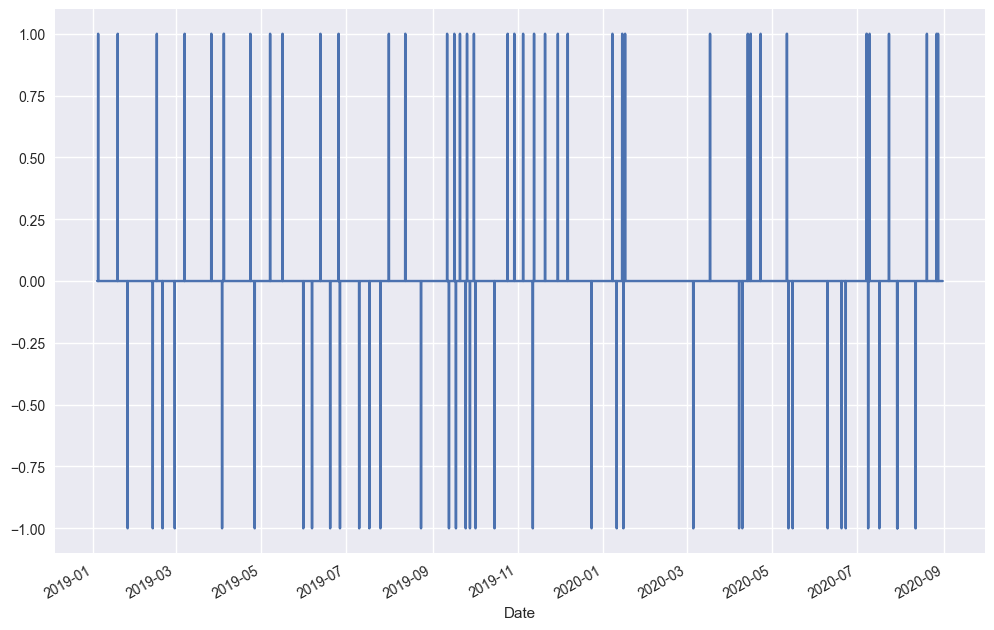

In [23]:
comb.position_comb.plot(figsize=(12, 8))
plt.show()

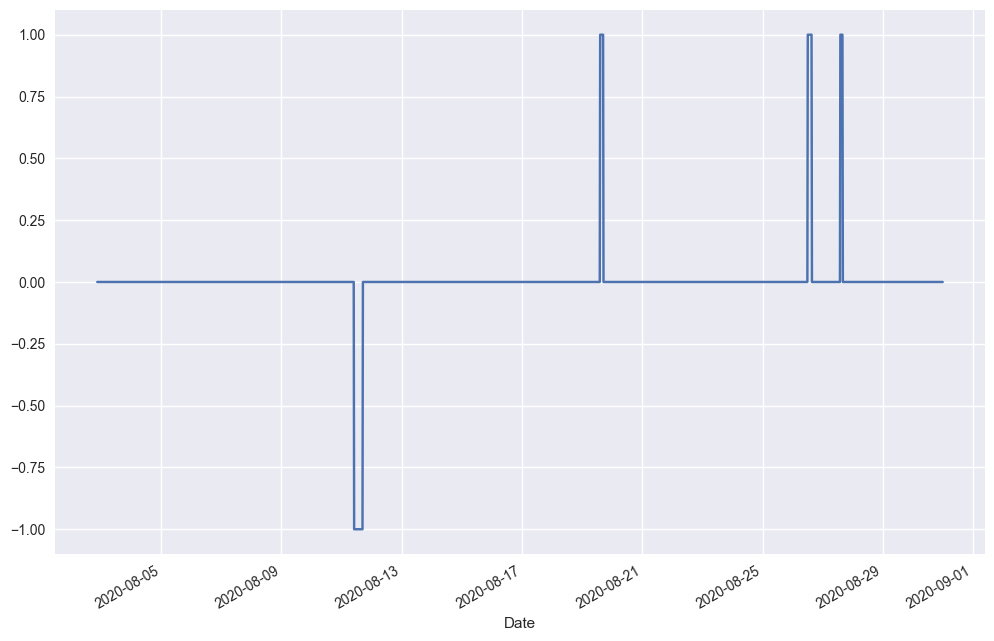

In [24]:
comb.position_comb.loc["2020-08"].plot(figsize=(12, 8))
plt.show()

### Backtesting the combined strategy

In [25]:
def backtest_strategy(df):
    tc = 0.000059

    df['strategy'] = df.position_comb.shift() * df.returns
    df.dropna(inplace=True)

    df['trades'] = df.position_comb.diff().fillna(0).abs()
    df.strategy = df.strategy - df.trades * tc

    df["creturns"] = df.returns.cumsum().apply(np.exp)
    df["cstrategy"] = df.strategy.cumsum().apply(np.exp)

    comb[["creturns", "cstrategy"]].plot(figsize=(12, 8),
                                         title=f"EUR/USD - SMA{sma_tester.SMA_S} | SMA{sma_tester.SMA_L}")
    plt.legend(fontsize=12)
    plt.show()

    return df

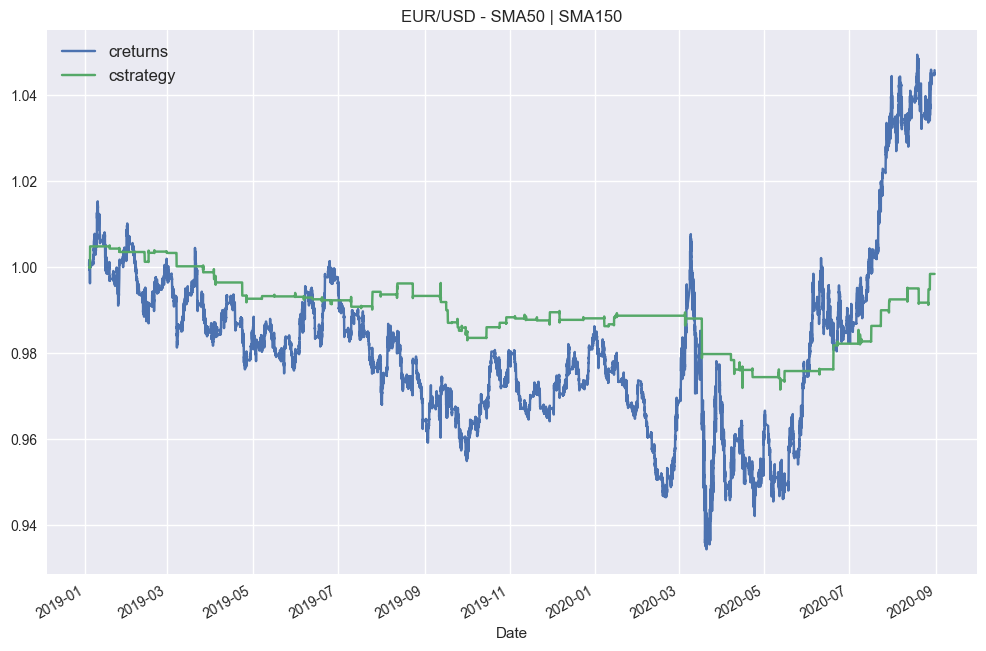

In [26]:
comb = backtest_strategy(comb)

### Using a position majority strategy

In [27]:
comb.position_comb = np.sign(comb.position_BB + comb.position_SMA)
comb.head(60)

,returns,position_SMA,position_BB,position_comb,EST,hour,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,
2019-01-04 00:20:00+00:00,0.000338,-1,-1,-1,2019-01-03 19:20:00-05:00,19,0.000000,0.0,1.000338,1.000000
2019-01-04 00:40:00+00:00,0.000627,-1,-1,-1,2019-01-03 19:40:00-05:00,19,0.000000,0.0,1.000965,1.000000
2019-01-04 01:00:00+00:00,-0.000013,-1,-1,-1,2019-01-03 20:00:00-05:00,20,-0.000000,0.0,1.000952,1.000000
2019-01-04 01:20:00+00:00,0.000180,-1,-1,-1,2019-01-03 20:20:00-05:00,20,0.000000,0.0,1.001132,1.000000
2019-01-04 01:40:00+00:00,-0.000298,-1,-1,-1,2019-01-03 20:40:00-05:00,20,-0.000000,0.0,1.000834,1.000000
2019-01-04 02:00:00+00:00,0.000241,-1,-1,-1,2019-01-03 21:00:00-05:00,21,0.000000,0.0,1.001075,1.000000
2019-01-04 02:20:00+00:00,-0.000487,-1,-1,-1,2019-01-03 21:20:00-05:00,21,-0.000000,0.0,1.000588,1.000000
2019-01-04 02:40:00+00:00,-0.000329,-1,-1,-1,2019-01-03 21:40:00-05:00,21,-0.000000,0.0,1.000259,1.000000
2019-01-04 03:00:00+00:00,-0.000531,-1,-1,-1,2019-01-03 22:00:00-05:00,22,-0.000000,0.0,0.999728,1.000000


In [28]:
comb.position_comb.value_counts()

position_comb
 0    10636
-1    10214
 1    10016
Name: count, dtype: int64

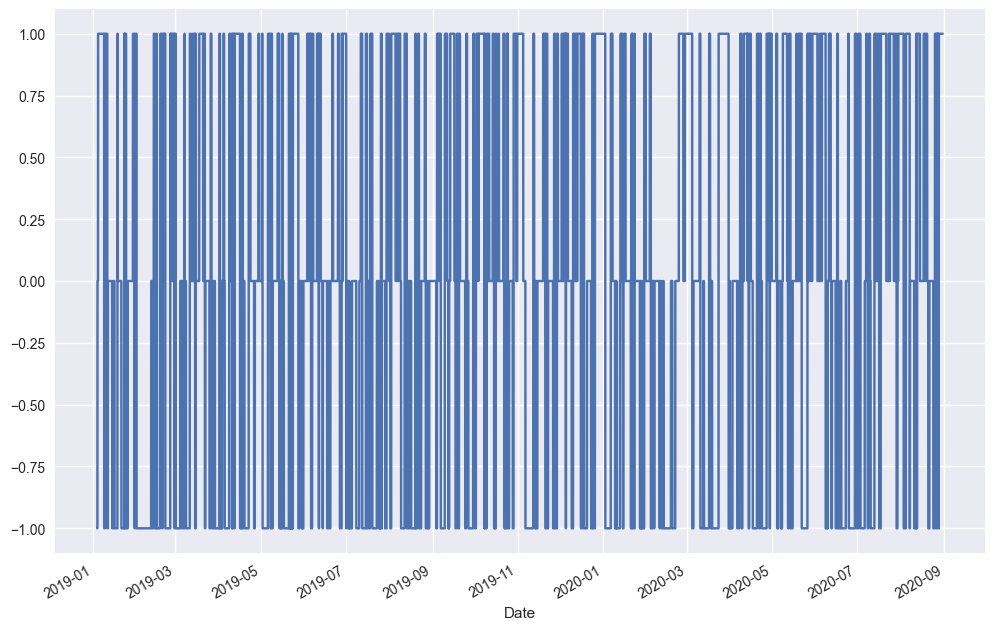

In [29]:
comb.position_comb.plot(figsize=(12, 8))
plt.show()

In [31]:
comb.position_comb = np.where(comb.hour.between(2, 12), comb.position_comb, 0)
comb.position_comb.value_counts()

position_comb
 0    20861
 1     5029
-1     4976
Name: count, dtype: int64

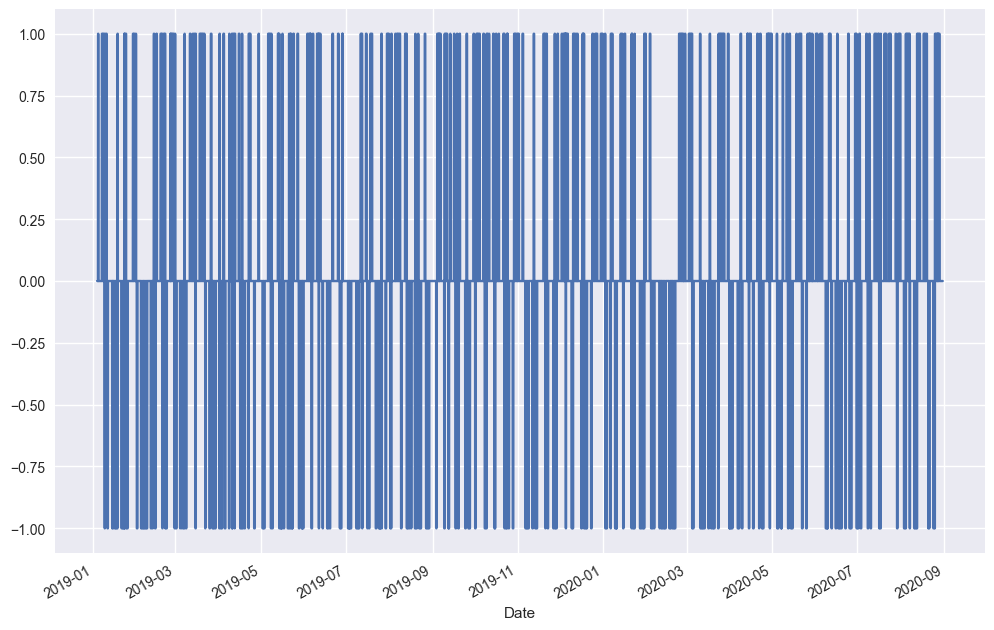

In [33]:
comb.position_comb.plot(figsize=(12, 8))
plt.show()

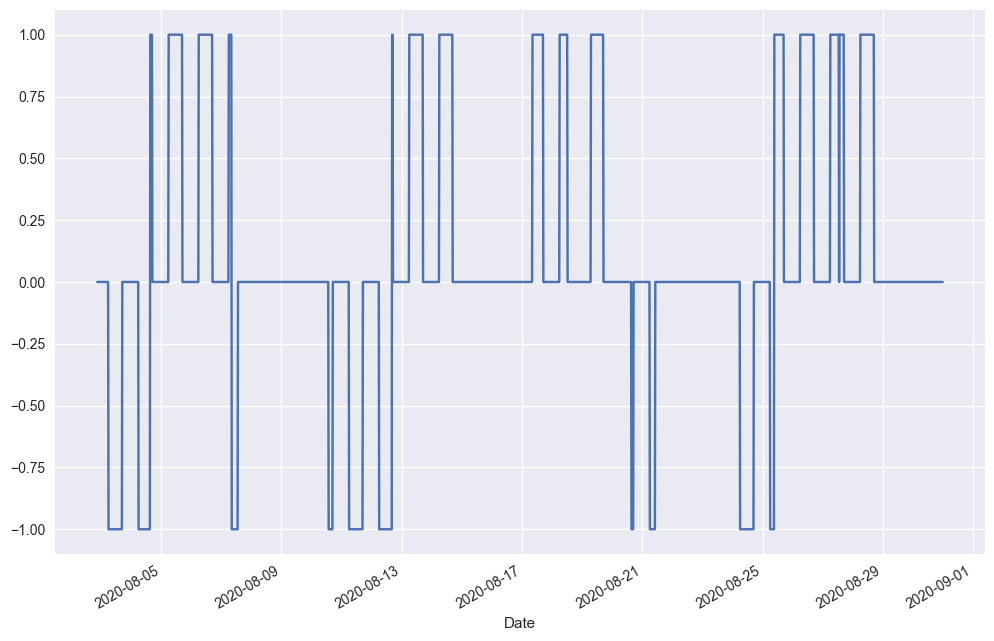

In [34]:
comb.position_comb.loc["2020-08"].plot(figsize=(12, 8))
plt.show()

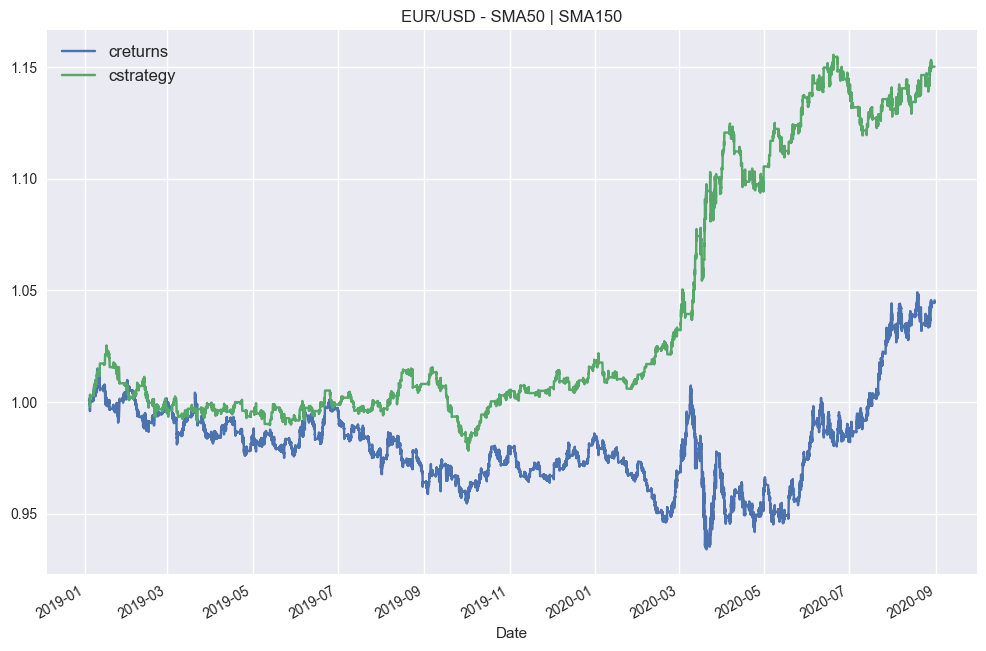

In [35]:
comb = backtest_strategy(comb)

In [36]:
comb.trades.value_counts()

trades
0.0    29979
1.0      830
2.0       56
Name: count, dtype: int64